In [27]:
import ME
import numpy as np
import matplotlib.pyplot as plt

def plot_spectrum(profile):
  
    plt.title('sample spectrum')
  
    
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.plot((profile.T)[i])

Константные параметры линии:

In [28]:
l_v = [6302.5, 2.5, 1]
argument = np.linspace(6302.0692255, 6303.2544205, 56)
line_arg = 1000*(argument - 6302.5)

Параметр №7 - интенсивность. Он определяет величину профиля и при генерации просто домножается в конце на посчитанный профиль единичной амплитуды.

В реальных измерениях интенсивность значительно меняется и является одним из параметров инверсии. Для hinode она лежит в интервале около [4000 : 20000]

In [29]:
p_v0 = [500, 20, 20, 50, 50, 10, 4000, 0.5, 0]
p_v1 = [500, 20, 20, 50, 50, 10, 20000, 0.5, 0]

In [32]:
profile0 = ME.ME(l_v, p_v0, line_arg)
profile1 = ME.ME(l_v, p_v1, line_arg)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


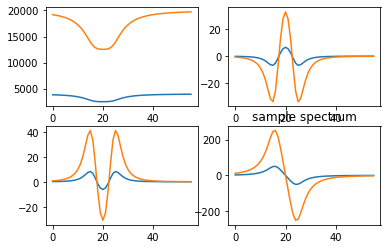

In [34]:
plot_spectrum(profile0)
plot_spectrum(profile1)

Видно, что при прочих равных параметрах спектры значительно отличаются друг от друга. Учет этого значительно усложнил бы задачу обучения. 

Однако, значение I (первый профиль) в крайних точках примерно соответствует интенсивности (точное соотношение может быть непостоянным, но не будет далеко от 1). Таким образом, перед инверсией профиля можно поделить его на эту величину:

In [35]:
profile0 = profile0 / profile0[0][0]
profile1 = profile1 / profile1[0][0]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


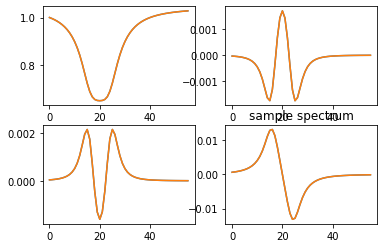

In [36]:
plot_spectrum(profile0)
plot_spectrum(profile1)

(Спектры совпали, т.к. остальные параметры равны)

Таким образом, можно значительно снизить искомый диапазон по величине интенсивности, оставив небольшой интервал около 1.